In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
months_fmt = mdates.DateFormatter('%B')
years_fmt = mdates.DateFormatter('%Y')

In [63]:
data = pd.read_csv("data.csv")
data.columns
d = data[['Date','Daily members posting messages','Messages posted by members']]
d['Date'] = pd.to_datetime(d['Date'])
d['Date']

/Users/jeremie/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     2019-08-03
1     2019-08-04
2     2019-08-05
3     2019-08-06
4     2019-08-07
         ...    
468   2020-11-13
469   2020-11-14
470   2020-11-15
471   2020-11-16
472   2020-11-17
Name: Date, Length: 473, dtype: datetime64[ns]

In [64]:
ma = d.rolling(30, min_periods=1).mean()
d[["MA Members Posting","MA Messages Posted"]] = ma

/Users/jeremie/Library/Python/3.7/lib/python/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


2019-08 2020-12


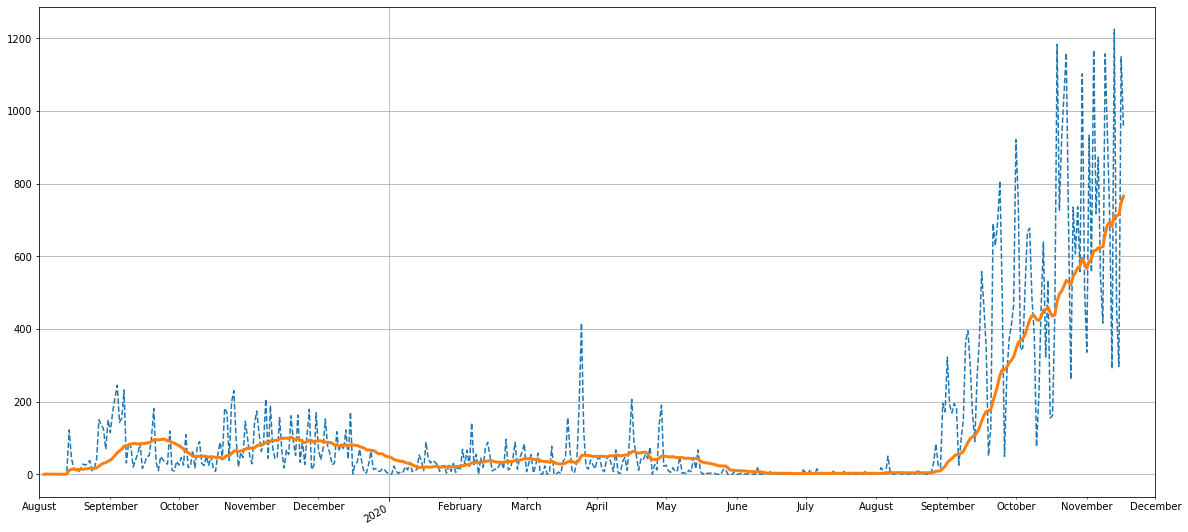

In [89]:
fig, ax = plt.subplots()
ax.plot_date(d['Date'], d['Messages posted by members'], "--", xdate=True, linewidth=1.5)
ax.plot_date(d['Date'], d['MA Messages Posted'], "-", xdate=True, linewidth=3)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(months_fmt)

# round to nearest years.
datemin = np.datetime64(d['Date'][0], 'M')
datemax = np.datetime64(d['Date'][len(d)-1], 'M') + np.timedelta64(1, 'M')
print(datemin, datemax)
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%M')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

In [66]:
before_date = 420 # 2020-09-16
print(d.loc[before_date])
print(d.loc[len(d)-1])
before = d.loc[before_date]["MA Messages Posted"]
after = d.loc[len(d)-1]["MA Messages Posted"]
print((after-before)/before)

Date                              2020-09-26 00:00:00
Daily members posting messages                     17
Messages posted by members                         49
MA Members Posting                            30.2667
MA Messages Posted                              286.6
Name: 420, dtype: object
Date                              2020-11-17 00:00:00
Daily members posting messages                     42
Messages posted by members                        955
MA Members Posting                            39.4667
MA Messages Posted                                765
Name: 472, dtype: object
1.6692254012561059
